In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df_train = pd.read_csv('../Desktop/csv_files/loan-approval/loan_sanction_train.csv')
df_test = pd.read_csv('../Desktop/csv_files/loan-approval/loan_sanction_test.csv')
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
df_train["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [7]:
import seaborn as sns

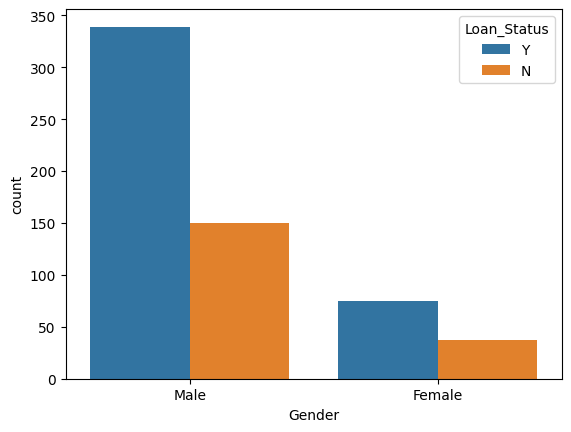

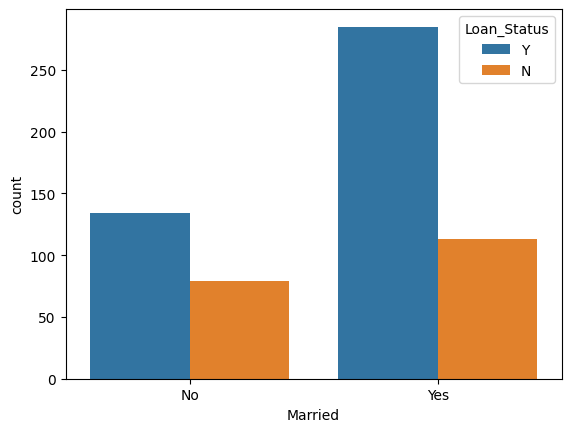

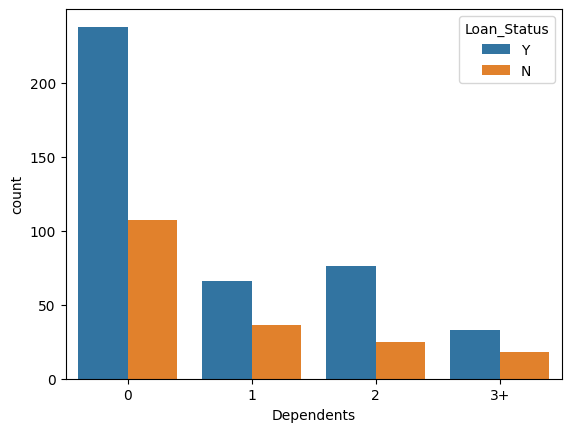

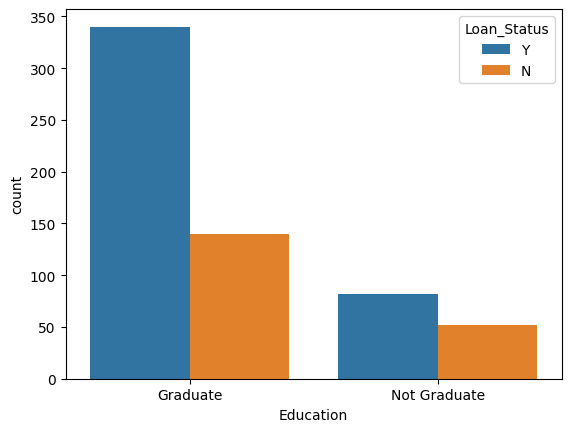

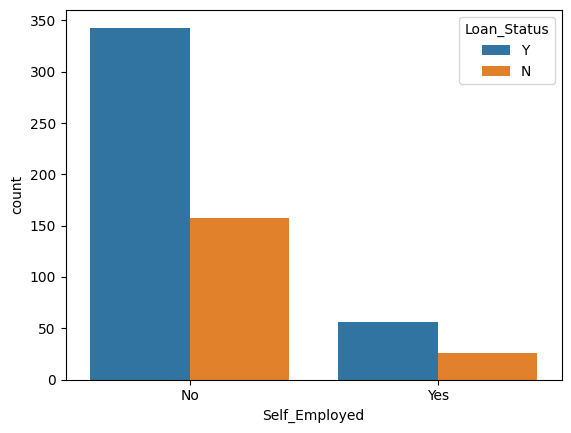

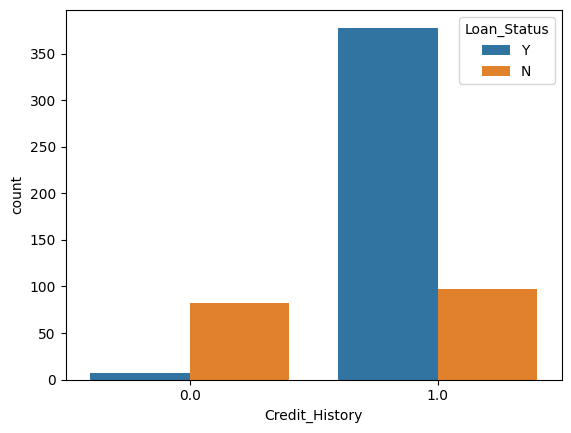

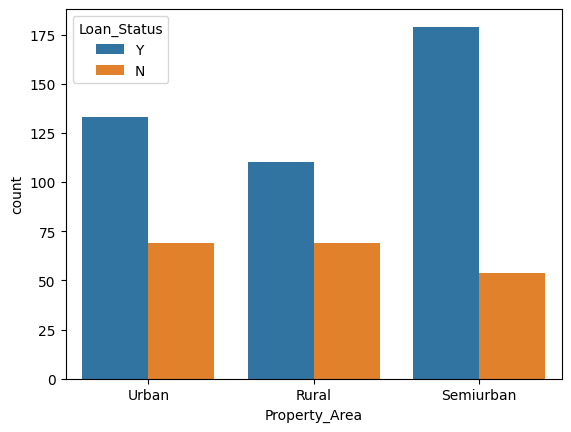

In [9]:
f1=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']
for i,cols in enumerate(f1):
    plt.figure(i)
    sns.countplot(x=df_train[cols],data=df_train,hue=df_train['Loan_Status'])


<AxesSubplot: >

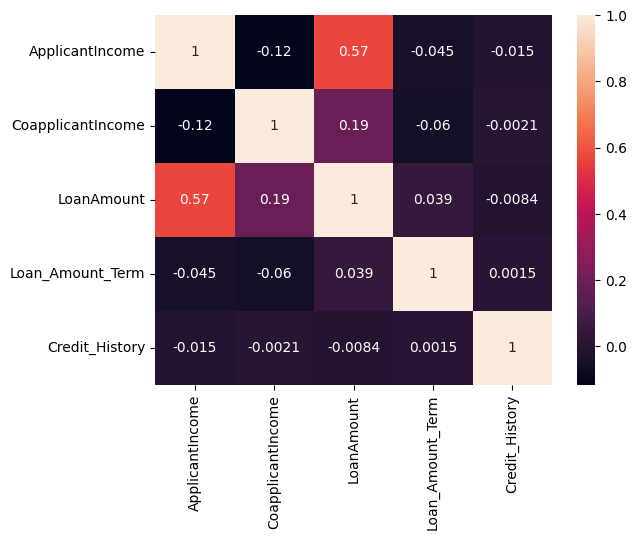

In [10]:
f2 = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
sns.heatmap(df_train[f2].corr(),annot=True)

more chances of getting approved for loan.
male>female. 
married.   
dependents zero.    
graduate.    
not a self employed 
credit history = 1
semiurban

In [12]:
df_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
x = df_train.drop(["Loan_ID","LoanAmount","Loan_Amount_Term","Credit_History","Loan_Status","ApplicantIncome","CoapplicantIncome"],axis='columns')
x

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural
2,Male,Yes,0,Graduate,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Urban
4,Male,No,0,Graduate,No,Urban
...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural
610,Male,Yes,3+,Graduate,No,Rural
611,Male,Yes,1,Graduate,No,Urban
612,Male,Yes,2,Graduate,No,Urban


In [19]:
x.isna().sum()

Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
dtype: int64

In [21]:
naval = ["Gender","Married","Dependents","Self_Employed"]
for col in naval:
    x[col] = x[col].fillna(x[col].value_counts().idxmax())
    
x.isna().sum() 

Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
dtype: int64